In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled.csv',index_col=0)
train_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,...,icd_10_code_C77.4,icd_10_code_C77.5,icd_10_code_C77.9,race_black or african american,race_not reported,race_white,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,vital_status_Dead
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-EE-A3AE,1,82.0,172.5,26.793641,52.0,198.2695,7260.4981,97.9081,0.2846,321.3320,...,1,0,0,0,0,1,0,1,0,0
TCGA-EE-A3AB,1,86.5,172.5,29.308234,30.0,279.7274,143990.5130,31.9909,0.0000,219866.3552,...,0,0,0,0,0,1,1,1,0,0
TCGA-ER-A2NH,1,64.0,174.5,20.702113,49.0,132.5213,49821.7181,107.4468,0.0000,112313.8298,...,0,0,0,0,0,1,1,1,0,0
TCGA-GN-A4U9,1,104.0,176.0,33.574380,71.0,185.3061,3267.8053,37.2580,0.8373,3.3490,...,1,0,0,0,0,1,1,1,0,1
TCGA-ER-A19A,1,64.0,167.5,22.767946,79.0,137.2926,53361.5831,113.3985,0.5545,105.6353,...,0,0,0,0,0,1,1,1,0,0


In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled.csv',index_col=0)
test_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,...,icd_10_code_C77.4,icd_10_code_C77.5,icd_10_code_C77.9,race_black or african american,race_not reported,race_white,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,vital_status_Dead
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-D3-A8GS,1,111.0,181.0,33.881750,52.0,546.5837,93090.1867,36.2796,0.0,330.7843,...,0,0,0,0,0,1,1,1,0,1
TCGA-EE-A2GS,1,84.5,170.0,27.917168,28.0,490.9347,17546.1929,38.8724,0.0,4970.6231,...,0,0,0,0,0,1,0,1,0,1
TCGA-D3-A2J7,1,93.0,175.0,30.367347,67.0,130.9387,18169.8586,252.1972,0.0,746.4017,...,0,0,1,0,0,1,1,1,0,1
TCGA-GN-A4U3,1,84.0,180.0,25.925926,30.0,261.4332,148931.6431,150.5854,0.0,872.8300,...,0,0,0,0,0,1,1,1,0,0
TCGA-XV-AAZW,0,74.0,170.0,25.605536,62.0,470.2573,4310.0451,89.8420,0.0,650.1129,...,0,0,0,0,0,1,0,1,0,1


In [4]:
gene_df_train = train_df.drop(['sample_type',
       'ajcc_pathologic_stage_Stage 0', 'ajcc_pathologic_stage_Stage I',
       'ajcc_pathologic_stage_Stage IA', 'ajcc_pathologic_stage_Stage IB',
       'ajcc_pathologic_stage_Stage II',
       'ajcc_pathologic_stage_Stage IIA',
       'ajcc_pathologic_stage_Stage IIB',
       'ajcc_pathologic_stage_Stage IIC',
       'ajcc_pathologic_stage_Stage III',
       'ajcc_pathologic_stage_Stage IIIA',
       'ajcc_pathologic_stage_Stage IIIB',
       'ajcc_pathologic_stage_Stage IIIC',
       'ajcc_pathologic_stage_Stage IV', 'tumor_stage_stage 0',
       'tumor_stage_stage i', 'tumor_stage_stage ia',
       'tumor_stage_stage ib', 'tumor_stage_stage ii',
       'tumor_stage_stage iia', 'tumor_stage_stage iib',
       'tumor_stage_stage iic', 'tumor_stage_stage iii',
       'tumor_stage_stage iiia', 'tumor_stage_stage iiib',
       'tumor_stage_stage iiic', 'tumor_stage_stage iv',
       'ajcc_pathologic_t_T1', 'ajcc_pathologic_t_T1a',
       'ajcc_pathologic_t_T1b', 'ajcc_pathologic_t_T2',
       'ajcc_pathologic_t_T2a', 'ajcc_pathologic_t_T2b',
       'ajcc_pathologic_t_T3', 'ajcc_pathologic_t_T3a',
       'ajcc_pathologic_t_T3b', 'ajcc_pathologic_t_T4',
       'ajcc_pathologic_t_T4a', 'ajcc_pathologic_t_T4b',
       'ajcc_pathologic_t_TX', 'ajcc_pathologic_t_Tis',
       'ajcc_pathologic_n_N1', 'ajcc_pathologic_n_N1a',
       'ajcc_pathologic_n_N1b', 'ajcc_pathologic_n_N2',
       'ajcc_pathologic_n_N2a', 'ajcc_pathologic_n_N2b',
       'ajcc_pathologic_n_N2c', 'ajcc_pathologic_n_N3',
       'ajcc_pathologic_n_NX', 'ajcc_pathologic_m_M1',
       'ajcc_pathologic_m_M1a', 'ajcc_pathologic_m_M1b',
       'ajcc_pathologic_m_M1c', 'icd_10_code_C18.9', 'icd_10_code_C22.0',
       'icd_10_code_C34.3', 'icd_10_code_C34.9', 'icd_10_code_C44.2',
       'icd_10_code_C44.3', 'icd_10_code_C44.31', 'icd_10_code_C44.4',
       'icd_10_code_C44.5', 'icd_10_code_C44.50', 'icd_10_code_C44.6',
       'icd_10_code_C44.601', 'icd_10_code_C44.7', 'icd_10_code_C44.701',
       'icd_10_code_C44.9', 'icd_10_code_C49.0', 'icd_10_code_C49.1',
       'icd_10_code_C49.2', 'icd_10_code_C49.20', 'icd_10_code_C49.3',
       'icd_10_code_C49.4', 'icd_10_code_C49.5', 'icd_10_code_C49.6',
       'icd_10_code_C49.9', 'icd_10_code_C51.9', 'icd_10_code_C71.1',
       'icd_10_code_C71.3', 'icd_10_code_C71.9', 'icd_10_code_C74.9',
       'icd_10_code_C76.1', 'icd_10_code_C76.2', 'icd_10_code_C76.3',
       'icd_10_code_C77.0', 'icd_10_code_C77.2', 'icd_10_code_C77.3',
       'icd_10_code_C77.4', 'icd_10_code_C77.5', 'icd_10_code_C77.9',
       'race_black or african american', 'race_not reported',
       'race_white', 'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported', 'vital_status_Dead', 'weight', 'height','bmi','age_at_index'
],1)
gene_df_train.head()

,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,...,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-EE-A3AE,198.2695,7260.4981,97.9081,0.2846,321.3320,0.0000,3174.0430,0.2846,2770.1722,797.4954,...,349.0508,0.2846,214.3162,0.0000,35.3010,1.7077,21.3462,102.0065,55.8788,44.6848
TCGA-EE-A3AB,279.7274,143990.5130,31.9909,0.0000,219866.3552,0.0000,3379.4536,0.5516,3049.6162,51.2958,...,895.6738,5.5157,498.6169,0.5516,18.0473,7.1704,17.0986,42.3107,317.2726,4.9641
TCGA-ER-A2NH,132.5213,49821.7181,107.4468,0.0000,112313.8298,1.0638,2638.2979,0.5319,5595.2128,135.1064,...,405.2660,0.0000,278.7234,0.5319,25.4468,10.1064,9.5745,209.4947,45.8085,37.2340
TCGA-GN-A4U9,185.3061,3267.8053,37.2580,0.8373,3.3490,7.1167,2561.1722,0.4186,1664.8875,168.7075,...,1308.7431,2.9304,440.8163,0.0000,12.5589,5.0235,42.7002,98.0513,332.3579,31.8158
TCGA-ER-A19A,137.2926,53361.5831,113.3985,0.5545,105.6353,20.7943,1715.9493,0.2773,3185.9707,345.1861,...,254.2206,0.2773,253.4137,1.9408,30.6259,1.6635,17.4672,373.9960,105.4301,10.2585


In [5]:
gene_df_test = test_df.drop(['sample_type',
       'ajcc_pathologic_stage_Stage 0', 'ajcc_pathologic_stage_Stage I',
       'ajcc_pathologic_stage_Stage IA', 'ajcc_pathologic_stage_Stage IB',
       'ajcc_pathologic_stage_Stage II',
       'ajcc_pathologic_stage_Stage IIA',
       'ajcc_pathologic_stage_Stage IIB',
       'ajcc_pathologic_stage_Stage IIC',
       'ajcc_pathologic_stage_Stage III',
       'ajcc_pathologic_stage_Stage IIIA',
       'ajcc_pathologic_stage_Stage IIIB',
       'ajcc_pathologic_stage_Stage IIIC',
       'ajcc_pathologic_stage_Stage IV', 'tumor_stage_stage 0',
       'tumor_stage_stage i', 'tumor_stage_stage ia',
       'tumor_stage_stage ib', 'tumor_stage_stage ii',
       'tumor_stage_stage iia', 'tumor_stage_stage iib',
       'tumor_stage_stage iic', 'tumor_stage_stage iii',
       'tumor_stage_stage iiia', 'tumor_stage_stage iiib',
       'tumor_stage_stage iiic', 'tumor_stage_stage iv',
       'ajcc_pathologic_t_T1', 'ajcc_pathologic_t_T1a',
       'ajcc_pathologic_t_T1b', 'ajcc_pathologic_t_T2',
       'ajcc_pathologic_t_T2a', 'ajcc_pathologic_t_T2b',
       'ajcc_pathologic_t_T3', 'ajcc_pathologic_t_T3a',
       'ajcc_pathologic_t_T3b', 'ajcc_pathologic_t_T4',
       'ajcc_pathologic_t_T4a', 'ajcc_pathologic_t_T4b',
       'ajcc_pathologic_t_TX', 'ajcc_pathologic_t_Tis',
       'ajcc_pathologic_n_N1', 'ajcc_pathologic_n_N1a',
       'ajcc_pathologic_n_N1b', 'ajcc_pathologic_n_N2',
       'ajcc_pathologic_n_N2a', 'ajcc_pathologic_n_N2b',
       'ajcc_pathologic_n_N2c', 'ajcc_pathologic_n_N3',
       'ajcc_pathologic_n_NX', 'ajcc_pathologic_m_M1',
       'ajcc_pathologic_m_M1a', 'ajcc_pathologic_m_M1b',
       'ajcc_pathologic_m_M1c', 'icd_10_code_C18.9', 'icd_10_code_C22.0',
       'icd_10_code_C34.3', 'icd_10_code_C34.9', 'icd_10_code_C44.2',
       'icd_10_code_C44.3', 'icd_10_code_C44.31', 'icd_10_code_C44.4',
       'icd_10_code_C44.5', 'icd_10_code_C44.50', 'icd_10_code_C44.6',
       'icd_10_code_C44.601', 'icd_10_code_C44.7', 'icd_10_code_C44.701',
       'icd_10_code_C44.9', 'icd_10_code_C49.0', 'icd_10_code_C49.1',
       'icd_10_code_C49.2', 'icd_10_code_C49.20', 'icd_10_code_C49.3',
       'icd_10_code_C49.4', 'icd_10_code_C49.5', 'icd_10_code_C49.6',
       'icd_10_code_C49.9', 'icd_10_code_C51.9', 'icd_10_code_C71.1',
       'icd_10_code_C71.3', 'icd_10_code_C71.9', 'icd_10_code_C74.9',
       'icd_10_code_C76.1', 'icd_10_code_C76.2', 'icd_10_code_C76.3',
       'icd_10_code_C77.0', 'icd_10_code_C77.2', 'icd_10_code_C77.3',
       'icd_10_code_C77.4', 'icd_10_code_C77.5', 'icd_10_code_C77.9',
       'race_black or african american', 'race_not reported',
       'race_white', 'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported', 'vital_status_Dead', 'weight', 'height','bmi','age_at_index'
],1)
gene_df_test.head()

,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,...,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-D3-A8GS,546.5837,93090.1867,36.2796,0.0,330.7843,0.0000,2735.1947,3.5568,2612.8401,53.3523,...,1525.5771,17.0727,39.1250,202.7388,35.9310,12.0932,12.0932,134.6541,13.0606,51.9296
TCGA-EE-A2GS,490.9347,17546.1929,38.8724,0.0,4970.6231,0.8902,3218.3976,1.1869,5455.4896,18.9911,...,580.5282,0.2967,317.2107,0.0000,74.9318,6.5282,34.7181,13.0861,227.4896,16.0237
TCGA-D3-A2J7,130.9387,18169.8586,252.1972,0.0,746.4017,1.5285,2822.0609,1.0190,8911.9857,1092.3449,...,261.2865,0.0000,114.6351,0.0000,16.3037,1.5285,2.5474,143.2531,504.7153,42.7971
TCGA-GN-A4U3,261.4332,148931.6431,150.5854,0.0,872.8300,0.0000,3880.0969,0.8074,3548.2438,378.6839,...,405.5632,0.0000,128.3811,0.0000,57.3395,10.0929,15.7449,35.1191,77.4162,18.9746
TCGA-XV-AAZW,470.2573,4310.0451,89.8420,0.0,650.1129,0.9029,3538.6005,1.8059,4191.8736,93.4537,...,645.3634,0.4515,235.2144,0.0000,36.8533,1.8059,17.1558,75.9323,17.7652,44.2438


In [6]:
gene_df_train_target = train_df[['sample_type']]
gene_df_train_target.astype(float, 64)
gene_df_train_target.head()

,sample_type
submitter_id,
TCGA-EE-A3AE,1
TCGA-EE-A3AB,1
TCGA-ER-A2NH,1
TCGA-GN-A4U9,1
TCGA-ER-A19A,1


In [7]:
gene_df_test_target = test_df[['sample_type']]
gene_df_test_target.astype(float, 64)
gene_df_test_target.head()

,sample_type
submitter_id,
TCGA-D3-A8GS,1
TCGA-EE-A2GS,1
TCGA-D3-A2J7,1
TCGA-GN-A4U3,1
TCGA-XV-AAZW,0


## Classification between Primary Tumor and Metastatic (without PCA)

### Logistic Regression

In [29]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_feature_lr = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr.fit(gene_df_train, gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr.best_score_)
print(grid_search_feature_lr.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.831):
{'logistic__C': 0.1, 'logistic__penalty': 'l1'}


LogisticRegression accuracy: 0.85


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

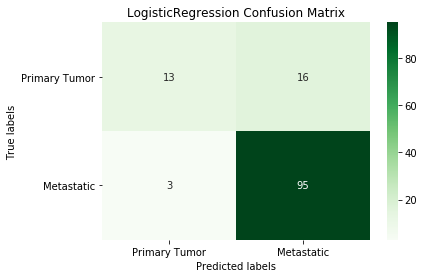

In [30]:
lr_model = grid_search_feature_lr.best_estimator_

lr_pred = grid_search_feature_lr.predict(gene_df_test)

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.sample_type.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

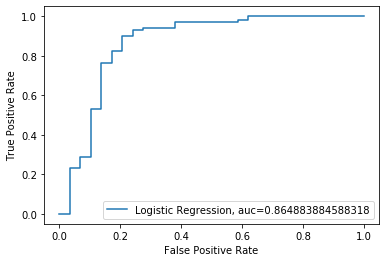

In [31]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [32]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print(log_loss_score)

0.344481450624998


### Support Vector Machines

In [12]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm.fit(gene_df_train, gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm.best_score_)
print(grid_search_feature_svm.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.865):
{'SVM__C': 100, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 1e-05, 'SVM__kernel': 'sigmoid'}


Support Vector Machines accuracy: 0.866


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

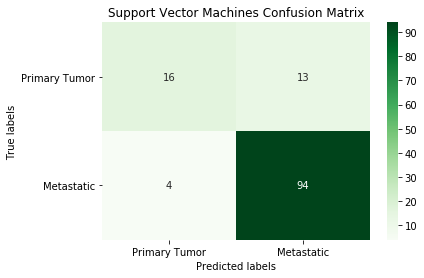

In [13]:
svm_model = grid_search_feature_svm.best_estimator_

svm_pred = grid_search_feature_svm.predict(gene_df_test)

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.sample_type.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

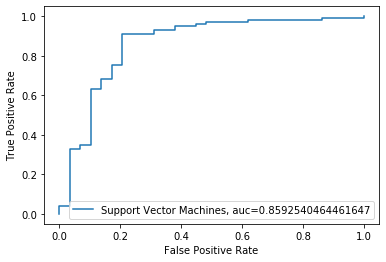

In [14]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [15]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.5306348651941389


### Random Forest 

In [16]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf.fit(gene_df_train, gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf.best_score_)
print(grid_search_feature_rf.best_params_)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.882):
{'rf__bootstrap': True, 'rf__max_features': 0.65, 'rf__min_samples_leaf': 12, 'rf__min_samples_split': 2, 'rf__n_estimators': 30}


Random Forest accuracy: 0.906


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

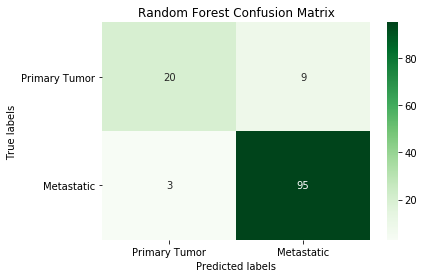

In [17]:
rf_model = grid_search_feature_rf.best_estimator_

rf_pred = grid_search_feature_rf.predict(gene_df_test)

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(gene_df_test_target.sample_type.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

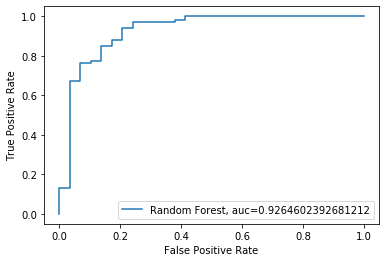

In [18]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(gene_df_test)[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [19]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(gene_df_test)[::,1]
log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.28158751969972046


### Weights

In [20]:
lr_model = grid_search_feature_lr.best_estimator_
lr_weights_df = pd.DataFrame(lr_model[1].coef_[0])
lr_weights_df.index = gene_df_train.columns
lr_weights_df.columns = ["weights"]
lr_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
lr_weights_df.head(10)

,weights
ZC4H2,0.045048
TBC1D9,0.036138
CLEC2B,0.017362
SFRP4,0.017343
C17orf72,0.011975
CILP,0.010271
KRBA2,0.005340
MTMR8,0.004633
C10orf12,0.001775
DOCK11,0.001370


In [21]:
svm_model = grid_search_feature_svm.best_estimator_
importances = np.dot(svm_model[1].support_,svm_model[1].support_vectors_)
svm_weights_df = pd.DataFrame(importances)
svm_weights_df.index = gene_df_train.columns
svm_weights_df.columns = ["weights"]
svm_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
svm_weights_df.head(10)

,weights
TMEM53,10529.151872
TXNL4A,10368.516854
ERI3,10298.741569
S100A13,10101.780117
NUDC,9879.705239
MECR,9820.471361
NHP2,9594.342414
MRPL24,9529.825966
GCDH,9375.374624
VDAC1,9370.623956


In [22]:
rf_model = grid_search_feature_rf.best_estimator_
rf_weights_df = pd.DataFrame(rf_model[1].feature_importances_)
rf_weights_df.index = gene_df_train.columns
rf_weights_df.columns = ["weights"]
rf_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
rf_weights_df.head(10)

,weights
C7,0.226768
KRT17,0.103968
S100A7A,0.089719
CLEC2A,0.070012
KRTDAP,0.063939
WFDC5,0.049629
KRT14,0.046513
S100A7,0.023747
KLK9,0.022158
LCE3D,0.016635


In [23]:
weights = lr_weights_df.merge(svm_weights_df,left_index=True, right_index=True)
weights = weights.merge(rf_weights_df,left_index=True, right_index=True)
weights.columns = ["Logistic Regression", "Support Vector Machines","Random Forest"]
weights.head(20)

,Logistic Regression,Support Vector Machines,Random Forest
ZC4H2,0.045048,-6149.795956,0.000000
TBC1D9,0.036138,-7398.706015,0.000000
CLEC2B,0.017362,-3059.828034,0.000000
SFRP4,0.017343,-2804.480982,0.000000
C17orf72,0.011975,-3593.992011,0.000000
CILP,0.010271,-2016.013077,0.000000
KRBA2,0.005340,-3076.566408,0.000000
MTMR8,0.004633,-4382.194033,0.000468
C10orf12,0.001775,-8594.238099,0.000000
DOCK11,0.001370,-9620.430852,0.000000


In [24]:
weights.to_csv('../data/Melanoma_Genomic_classifier_weights_all_data.csv')

In [25]:
genes_top10 = rf_weights_df.head(10)
genes_top20 = rf_weights_df.head(20)
genes_top30 = rf_weights_df.head(30)
genes_top40 = rf_weights_df.head(40)
genes_top50 = rf_weights_df.head(50)
genes_top60 = rf_weights_df.head(60)
genes_top70 = rf_weights_df.head(70)
genes_top80 = rf_weights_df.head(80)
genes_top90 = rf_weights_df.head(90)
genes_top100 = rf_weights_df.head(100)

In [27]:
genes_top10.index.values

array(['C7', 'KRT17', 'S100A7A', 'CLEC2A', 'KRTDAP', 'WFDC5', 'KRT14',
       'S100A7', 'KLK9', 'LCE3D'], dtype=object)

In [59]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr10 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr10.fit(gene_df_train.loc[:,genes_top10.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr10.best_score_)
print(grid_search_feature_lr10.best_params_)

lr_model = grid_search_feature_lr10.best_estimator_
lr_pred = grid_search_feature_lr10.predict(gene_df_test.loc[:,genes_top10.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top10.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.875):
{'logistic__C': 10, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.882
LogisticRegression auc: 0.947923997185081
LogisticRegression log_loss_score: 0.28136381914344477


In [60]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr20 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr20.fit(gene_df_train.loc[:,genes_top20.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr20.best_score_)
print(grid_search_feature_lr20.best_params_)

lr_model = grid_search_feature_lr20.best_estimator_
lr_pred = grid_search_feature_lr20.predict(gene_df_test.loc[:,genes_top20.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top20.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.889):
{'logistic__C': 10, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.819
LogisticRegression auc: 0.8462350457424348
LogisticRegression log_loss_score: 0.4566485680252945


In [61]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr30 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr30.fit(gene_df_train.loc[:,genes_top30.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr30.best_score_)
print(grid_search_feature_lr30.best_params_)

lr_model = grid_search_feature_lr30.best_estimator_
lr_pred = grid_search_feature_lr30.predict(gene_df_test.loc[:,genes_top30.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top30.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.882):
{'logistic__C': 10, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.85
LogisticRegression auc: 0.8780788177339902
LogisticRegression log_loss_score: 0.6907885650458195


In [62]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr40 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr40.fit(gene_df_train.loc[:,genes_top40.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr40.best_score_)
print(grid_search_feature_lr40.best_params_)

lr_model = grid_search_feature_lr40.best_estimator_
lr_pred = grid_search_feature_lr40.predict(gene_df_test.loc[:,genes_top40.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top40.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.858):
{'logistic__C': 100, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.866
LogisticRegression auc: 0.8954961294862773
LogisticRegression log_loss_score: 0.621838903537645


In [63]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr50 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr50.fit(gene_df_train.loc[:,genes_top50.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr50.best_score_)
print(grid_search_feature_lr50.best_params_)

lr_model = grid_search_feature_lr50.best_estimator_
lr_pred = grid_search_feature_lr50.predict(gene_df_test.loc[:,genes_top50.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top50.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.865):
{'logistic__C': 1, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.811
LogisticRegression auc: 0.8592540464461647
LogisticRegression log_loss_score: 0.6650335665432172


In [64]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr60 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr60.fit(gene_df_train.loc[:,genes_top60.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr60.best_score_)
print(grid_search_feature_lr60.best_params_)

lr_model = grid_search_feature_lr60.best_estimator_
lr_pred = grid_search_feature_lr60.predict(gene_df_test.loc[:,genes_top60.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top60.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.838):
{'logistic__C': 100, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.811
LogisticRegression auc: 0.8402533427163968
LogisticRegression log_loss_score: 2.664018491187486


/home/jovyan/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [65]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr70 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr70.fit(gene_df_train.loc[:,genes_top70.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr70.best_score_)
print(grid_search_feature_lr70.best_params_)

lr_model = grid_search_feature_lr70.best_estimator_
lr_pred = grid_search_feature_lr70.predict(gene_df_test.loc[:,genes_top70.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top70.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.818):
{'logistic__C': 10, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.858
LogisticRegression auc: 0.8699859254046446
LogisticRegression log_loss_score: 1.701380418445887


In [66]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr80 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr80.fit(gene_df_train.loc[:,genes_top80.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr80.best_score_)
print(grid_search_feature_lr80.best_params_)

lr_model = grid_search_feature_lr80.best_estimator_
lr_pred = grid_search_feature_lr80.predict(gene_df_test.loc[:,genes_top80.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top80.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.821):
{'logistic__C': 10, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.827
LogisticRegression auc: 0.8448275862068965
LogisticRegression log_loss_score: 1.848178650241968


In [67]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr90 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr90.fit(gene_df_train.loc[:,genes_top90.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr90.best_score_)
print(grid_search_feature_lr90.best_params_)

lr_model = grid_search_feature_lr90.best_estimator_
lr_pred = grid_search_feature_lr90.predict(gene_df_test.loc[:,genes_top90.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top90.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.834):
{'logistic__C': 100, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.78
LogisticRegression auc: 0.8332160450387052
LogisticRegression log_loss_score: 2.8743825530611176


In [68]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1']
}

grid_search_feature_lr100 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr100.fit(gene_df_train.loc[:,genes_top100.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr100.best_score_)
print(grid_search_feature_lr100.best_params_)

lr_model = grid_search_feature_lr100.best_estimator_
lr_pred = grid_search_feature_lr100.predict(gene_df_test.loc[:,genes_top100.index.values])

print('LogisticRegression accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), lr_pred), 3))

lr_pred_proba = lr_model.predict_proba(gene_df_test.loc[:,genes_top100.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), lr_pred_proba)
print('LogisticRegression auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  lr_pred_proba)
print('LogisticRegression log_loss_score:', log_loss_score)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best parameter (CV score=0.818):
{'logistic__C': 0.1, 'logistic__penalty': 'l1'}
LogisticRegression accuracy: 0.787
LogisticRegression auc: 0.8374384236453202
LogisticRegression log_loss_score: 0.4702667690314627


In [69]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm10 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm10.fit(gene_df_train.loc[:,genes_top10.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm10.best_score_)
print(grid_search_feature_svm10.best_params_)


svm_model = grid_search_feature_svm10.best_estimator_
svm_pred = grid_search_feature_svm10.predict(gene_df_test.loc[:,genes_top10.index.values])

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), svm_pred), 3))

svm_pred_proba = svm_model.predict_proba(gene_df_test.loc[:,genes_top10.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), svm_pred_proba)
print('Support Vector Machines auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Support Vector Machines log_loss_score:', log_loss_score)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.895):
{'SVM__C': 0.1, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 10, 'SVM__kernel': 'poly'}
Support Vector Machines accuracy: 0.89
Support Vector Machines auc: 0.9176636171710064
Support Vector Machines log_loss_score: 0.499890814012708


In [70]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm20 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm20.fit(gene_df_train.loc[:,genes_top20.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm20.best_score_)
print(grid_search_feature_svm20.best_params_)


svm_model = grid_search_feature_svm20.best_estimator_
svm_pred = grid_search_feature_svm20.predict(gene_df_test.loc[:,genes_top20.index.values])

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), svm_pred), 3))

svm_pred_proba = svm_model.predict_proba(gene_df_test.loc[:,genes_top20.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), svm_pred_proba)
print('Support Vector Machines auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Support Vector Machines log_loss_score:', log_loss_score)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.899):
{'SVM__C': 100, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
Support Vector Machines accuracy: 0.85
Support Vector Machines auc: 0.8578465869106263
Support Vector Machines log_loss_score: 0.3541234178101921


In [71]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm30 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm30.fit(gene_df_train.loc[:,genes_top30.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm30.best_score_)
print(grid_search_feature_svm20.best_params_)


svm_model = grid_search_feature_svm30.best_estimator_
svm_pred = grid_search_feature_svm30.predict(gene_df_test.loc[:,genes_top30.index.values])

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), svm_pred), 3))

svm_pred_proba = svm_model.predict_proba(gene_df_test.loc[:,genes_top30.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), svm_pred_proba)
print('Support Vector Machines auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Support Vector Machines log_loss_score:', log_loss_score)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.889):
{'SVM__C': 100, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
Support Vector Machines accuracy: 0.843
Support Vector Machines auc: 0.8715693173821253
Support Vector Machines log_loss_score: 0.4683214160307921


In [72]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm40 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm40.fit(gene_df_train.loc[:,genes_top40.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm40.best_score_)
print(grid_search_feature_svm40.best_params_)


svm_model = grid_search_feature_svm40.best_estimator_
svm_pred = grid_search_feature_svm40.predict(gene_df_test.loc[:,genes_top40.index.values])

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), svm_pred), 3))

svm_pred_proba = svm_model.predict_proba(gene_df_test.loc[:,genes_top40.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), svm_pred_proba)
print('Support Vector Machines auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Support Vector Machines log_loss_score:', log_loss_score)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.858):
{'SVM__C': 10, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
Support Vector Machines accuracy: 0.835
Support Vector Machines auc: 0.8610133708655876
Support Vector Machines log_loss_score: 0.3589473292682878


In [73]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm50 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm50.fit(gene_df_train.loc[:,genes_top50.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm50.best_score_)
print(grid_search_feature_svm50.best_params_)


svm_model = grid_search_feature_svm50.best_estimator_
svm_pred = grid_search_feature_svm50.predict(gene_df_test.loc[:,genes_top50.index.values])

print('Support Vector Machines accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), svm_pred), 3))

svm_pred_proba = svm_model.predict_proba(gene_df_test.loc[:,genes_top50.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), svm_pred_proba)
print('Support Vector Machines auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Support Vector Machines log_loss_score:', log_loss_score)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.861):
{'SVM__C': 100, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
Support Vector Machines accuracy: 0.819
Support Vector Machines auc: 0.8110485573539761
Support Vector Machines log_loss_score: 0.4028986600453566


In [74]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf10 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf10.fit(gene_df_train.loc[:,genes_top10.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf10.best_score_)
print(grid_search_feature_rf10.best_params_)

rf_model = grid_search_feature_rf10.best_estimator_
rf_pred = grid_search_feature_rf10.predict(gene_df_test.loc[:,genes_top10.index.values])

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), rf_pred), 3))

rf_pred_proba = rf_model.predict_proba(gene_df_test.loc[:,genes_top10.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), rf_pred_proba)
print('Random Forest auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Random Forest log_loss_score:', log_loss_score)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.902):
{'rf__bootstrap': True, 'rf__max_features': 0.8, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 60}
Random Forest accuracy: 0.882
Random Forest auc: 0.9366643209007741
Random Forest log_loss_score: 0.4028986600453566


In [75]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf20 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf20.fit(gene_df_train.loc[:,genes_top20.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf20.best_score_)
print(grid_search_feature_rf20.best_params_)

rf_model = grid_search_feature_rf20.best_estimator_
rf_pred = grid_search_feature_rf20.predict(gene_df_test.loc[:,genes_top20.index.values])

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), rf_pred), 3))

rf_pred_proba = rf_model.predict_proba(gene_df_test.loc[:,genes_top20.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), rf_pred_proba)
print('Random Forest auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Random Forest log_loss_score:', log_loss_score)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.902):
{'rf__bootstrap': True, 'rf__max_features': 0.8, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 30}
Random Forest accuracy: 0.89
Random Forest auc: 0.9268121041520057
Random Forest log_loss_score: 0.4028986600453566


In [76]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf30 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf30.fit(gene_df_train.loc[:,genes_top30.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf30.best_score_)
print(grid_search_feature_rf30.best_params_)

rf_model = grid_search_feature_rf30.best_estimator_
rf_pred = grid_search_feature_rf30.predict(gene_df_test.loc[:,genes_top30.index.values])

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), rf_pred), 3))

rf_pred_proba = rf_model.predict_proba(gene_df_test.loc[:,genes_top30.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), rf_pred_proba)
print('Random Forest auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Random Forest log_loss_score:', log_loss_score)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.902):
{'rf__bootstrap': True, 'rf__max_features': 0.65, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 80}
Random Forest accuracy: 0.898
Random Forest auc: 0.9320900774102745
Random Forest log_loss_score: 0.4028986600453566


In [77]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf40 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf40.fit(gene_df_train.loc[:,genes_top40.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf40.best_score_)
print(grid_search_feature_rf40.best_params_)

rf_model = grid_search_feature_rf40.best_estimator_
rf_pred = grid_search_feature_rf40.predict(gene_df_test.loc[:,genes_top40.index.values])

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), rf_pred), 3))

rf_pred_proba = rf_model.predict_proba(gene_df_test.loc[:,genes_top40.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), rf_pred_proba)
print('Random Forest auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Random Forest log_loss_score:', log_loss_score)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.909):
{'rf__bootstrap': True, 'rf__max_features': 0.75, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 90}
Random Forest accuracy: 0.89
Random Forest auc: 0.928747361013371
Random Forest log_loss_score: 0.4028986600453566


In [78]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf50 = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf50.fit(gene_df_train.loc[:,genes_top50.index.values], gene_df_train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf50.best_score_)
print(grid_search_feature_rf50.best_params_)

rf_model = grid_search_feature_rf50.best_estimator_
rf_pred = grid_search_feature_rf50.predict(gene_df_test.loc[:,genes_top50.index.values])

print('Random Forest accuracy:', round(accuracy_score(gene_df_test_target.sample_type.astype('int'), rf_pred), 3))

rf_pred_proba = rf_model.predict_proba(gene_df_test.loc[:,genes_top50.index.values])[::,1]
fpr, tpr, _ = roc_curve(gene_df_test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(gene_df_test_target.sample_type.astype('int'), rf_pred_proba)
print('Random Forest auc:', auc)

log_loss_score = log_loss(gene_df_test_target.sample_type.astype('int'),  svm_pred_proba)
print('Random Forest log_loss_score:', log_loss_score)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.909):
{'rf__bootstrap': True, 'rf__max_features': 0.6, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 2, 'rf__n_estimators': 70}
Random Forest accuracy: 0.882
Random Forest auc: 0.9370161857846586
Random Forest log_loss_score: 0.4028986600453566
